In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
sales = pd.read_csv('retailer_forecasted_sales.csv')
feature_cols = ["Marketing_Spend", "Store_Traffic", "Average_Discount"]
target_col = "Forecasted_Sales"

X = sales[feature_cols]
y = sales[target_col]

print(sales.shape)
print(X.shape)
print(y.shape)

(36, 5)
(36, 3)
(36,)


In [53]:
# Splitting the Data to prevent fake accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Creating a Pipeline to allow making predictions easy
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0)),
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
# Testing how wrong the model is
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred,))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.3f}')

MAE: 12645.99RMSE: 17867.86R2: 0.947

In [58]:
# Checking if the model is properly fitted
print(pipe.score(X_test, y_test))
print(pipe.score(X_train, y_train))

0.9479740526715253
0.9736268983185099


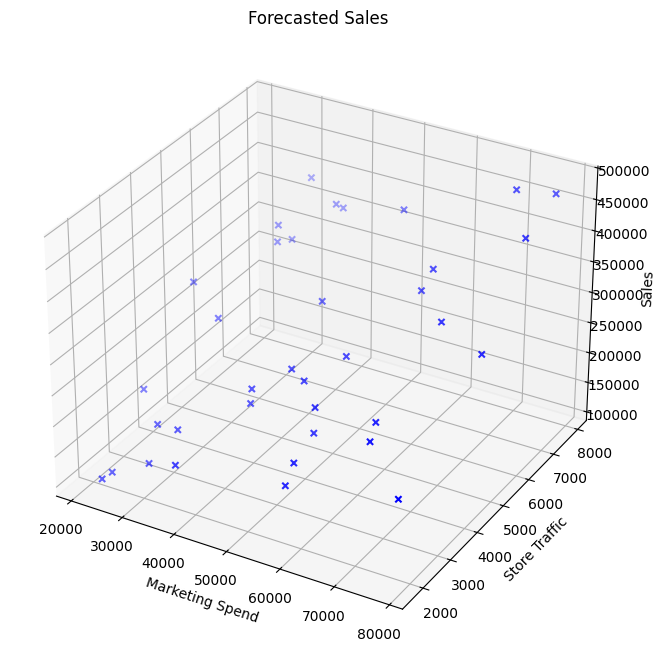

In [67]:
# Visualizing the data on a 3D graph
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Marketing_Spend'],X['Store_Traffic'],y,c='b',marker='x')
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Store Traffic')
ax.set_zlabel('Sales')
plt.title('Forecasted Sales')
plt.show()


In [72]:
# Making a new prediction
new_data = pd.DataFrame({
    'Marketing_Spend': [27539.2],
    'Store_Traffic': [1801],
    'Average_Discount': [11.2],
})
prediction = pipe.predict(new_data)
print(f'{prediction}')

[129102.76677742]
